### Perkenalan

Anggota Kelompok :
- Almanik Balingga
- Muhammad Aziz Pratama
- Ghina Khoerunnisa

Disini kami memilih Final Project ke-3 Ensenmble memakai Random Forest dengan dataset Heart Failure Prediction.

Latar Belakang : Menurut kami permasalahan ini menarik untuk dipecahkan karena masalah ini menyangkut isu kesehatan yang merupakan hal yang sangat penting. Selain itu berdasarkan Kompas pada tahun 2020 mengatakan bahwa penyakit jantung merupakan penyebab kematian utama di dunia. Pada tahun 2005 sekitar 7,6 juta orang meninggal dunia akibat Jantung Koroner saja. Dikutip dari Karyatin pada tahun 2019, WHO memperkirakan sekitar 17 juta orang meninggal akibat penyakit kardiovaskuler, setiap 5 detiknya ada satu orang yang meninggal akibat serangan jantung. Tujuan dari tugas ini adalah untuk memprediksi keselamatan pasien dari penyakit jantung.
<br>
<br>
Dataset bersumber dari Kaggle dan dapat dilihat [disini](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data). Pada dataset ini terdapat 299 baris dan 13 kolom dimana kita diminta untuk memprediksi keselamatan pasien penyakit jantung

### Import Pustaka yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

**Projects Overview** <br>
Data ini memiliki 13 atribut. Prediksi keselamatan pasien dari penyakit jantung.

**Attribute Information:**

1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

### Data Loading

In [ ]:
# load dataset
df = pd.read_csv('https://raw.githubusercontent.com/ghinakh/H8_001/main/Final%20Project%203/dataset/heart_failure_clinical_records_dataset.csv')

In [ ]:
# melihat 5 data teratas
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
# dimensi dataset
df.shape

(299, 13)

In [ ]:
#melihat deskripsi singkat data, sekaligus dengan central tendency nya
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
#melihat info dari tiap tipe data feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Data Cleaning

In [ ]:
# cek missing values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
# cek duplikat
df.duplicated().sum()

0

Pada dataset ini, tidak ditemukan missing values dari suatu feature maupun data redundant(duplikasi)

In [ ]:
# membuat list yang berisi kolom-kolom numeric
numeric_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

### Eksplorasi Data

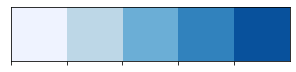

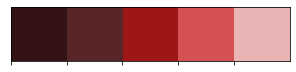

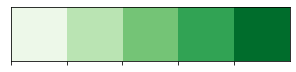

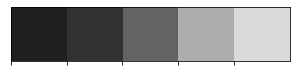

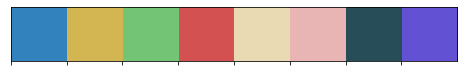

In [ ]:
# membuat list colors palette yang digunakan untuk visualisasi
colors_blue = ['#eff3ff','#bdd7e7','#6baed6','#3182bd','#08519c']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#edf8e9','#bae4b3','#74c476','#31a354','#006d2c']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_mix = ["#3182bd",'#D3B651', '#74c476', '#D35151', '#E9DAB4', '#E9B4B4', '#264D58', '#6351D3']

# plot colors palette 
sns.palplot(colors_blue)
sns.palplot(colors_red)
sns.palplot(colors_green)
sns.palplot(colors_dark)
sns.palplot(colors_mix)

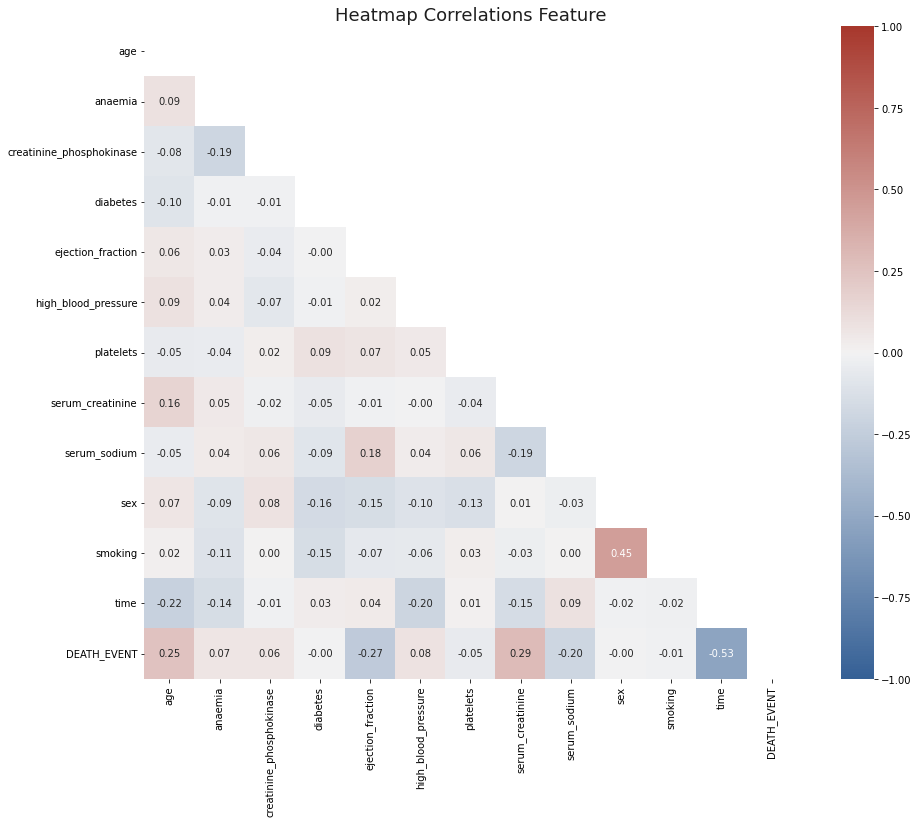

In [ ]:
# menghitung korelasi
df_corr = df.corr()

# mengatur mask dan cmap
mask = np.triu(np.ones_like(df_corr, dtype=bool))
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

# membuat heatmap dari data korelasi
plt.figure(figsize=(16, 12))
sns.heatmap(df_corr, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap, vmin=-1,vmax=1)

# mengatur title
plt.title("Heatmap Correlations Feature", y=1.04, fontsize=18, color=colors_dark[0]) 

plt.show()

In [ ]:
# mengelompokkan death_event dan menghitung valuenya
death_data = df.groupby(['DEATH_EVENT'], as_index=False)['DEATH_EVENT'].count()

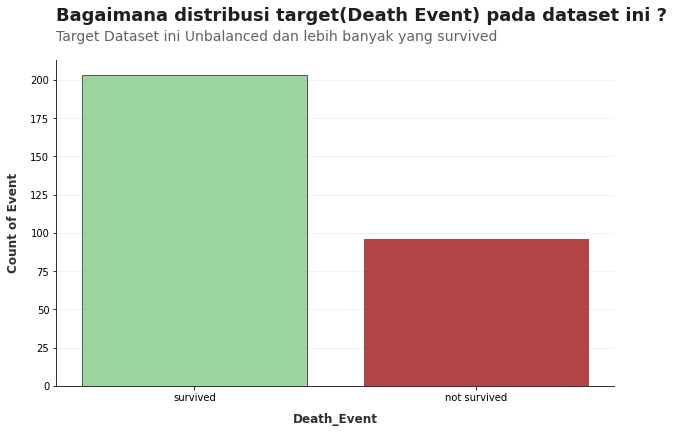

In [ ]:
# membuat plot barchart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(['survived', 'not survived'], death_data['DEATH_EVENT'], alpha=0.8, color=colors_red[2])

# menandai bar paling besar
bars[0].set_alpha(0.7)
bars[0].set_color(colors_green[2])
bars[0].set_edgecolor(colors_dark[0])

# setting figure
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='y', alpha=0.2)
ax.set_axisbelow(True)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# set label
ax.set_xlabel("Death_Event", fontsize=12, labelpad=10, fontweight='bold', color=colors_dark[1])
ax.set_ylabel("Count of Event", fontsize=12, labelpad=10, fontweight='bold', color=colors_dark[1])

plt.text(s="Bagaimana distribusi target(Death Event) pada dataset ini ?", ha='left', x=xmin, y=ymax*1.12, fontsize=18, fontweight='bold', color=colors_dark[0])
plt.title("Target Dataset ini Unbalanced dan lebih banyak yang survived", y=1.04, loc='left', fontsize=14, color=colors_dark[2]) 

plt.show()

Berdasarkan plot di atas dataset ini memiliki class yang imbalance yang mana mayoritas datanya memiliki target survived (0)

In [ ]:
# meng-copy df dengan fitur sex dan death event ke dalam variabel baru
temp = df[['sex','DEATH_EVENT']].copy()

# mengubah value 0 dan 1 menjadi female dan male (untuk visualisasi)
temp['sex'].replace({0:'female', 1:'male'}, inplace=True)

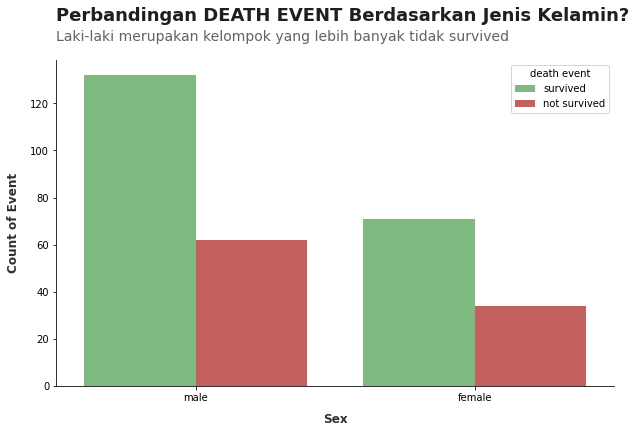

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# membuat plot perbandingan death event berdasarkan jenis kelamis
sns.countplot(x='sex',hue='DEATH_EVENT', data=temp, palette=[colors_green[2],colors_red[3]])

# mengatur legend
plt.legend(title='death event', loc='upper right', labels=['survived', 'not survived'])
plt.xlabel('sex')

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# set label
ax.set_xlabel("Sex", fontsize=12, labelpad=10, fontweight='bold', color=colors_dark[1])
ax.set_ylabel("Count of Event", fontsize=12, labelpad=10, fontweight='bold', color=colors_dark[1])

# mengatur title dan annotate
plt.text(s="Perbandingan DEATH EVENT Berdasarkan Jenis Kelamin?", ha='left', x=xmin, y=ymax*1.12, fontsize=18, fontweight='bold', color=colors_dark[0])
plt.title("Laki-laki merupakan kelompok yang lebih banyak tidak survived", y=1.04, loc='left', fontsize=14, color=colors_dark[2]) 
sns.despine()
plt.show()

In [ ]:
# menghitung jumlah pasien laki-laki dan meninggal
male_death = len(df[(df['sex'] == 1) & (df['DEATH_EVENT']==1)])

# menghitung jumlah pasien perempuan dan meninggal
female_death = len(df[(df['sex'] == 0) & (df['DEATH_EVENT']==1)])

# menghitung jumlah pasien yang meninggal
total_death = len(df[df['DEATH_EVENT'] == 1])

In [ ]:
# menghitung persentase pasien yang meninggal berdasarkan jenis kelamin => jumlah pasien laki-laki/perempuan yang meninggal dibagi dengan total pasien yang meninggal
p_male_death, p_female_death = round(male_death/total_death,2), round(female_death/total_death,2)
p_male_death, p_female_death

(0.65, 0.35)

In [ ]:
# menghitung standar error untuk pasien laki-laki dan meninggal
se_male = np.sqrt(p_male_death * (1-p_male_death) / total_death)

# menghitung batas atas dan batas bawah
z_score = 1.96
lcb_male = p_male_death - z_score* se_male #lower limit of the CI
ucb_male = p_male_death + z_score* se_male #upper limit of the CI
lcb_male, ucb_male

(0.554586208194692, 0.7454137918053081)

In [ ]:
# menghitung standar error untuk pasien perempuan dan meninggal
se_female = np.sqrt(p_female_death * (1-p_female_death) / total_death)

# menghitung batas atas dan batas bawah
z_score = 1.96
lcb_female = p_female_death - z_score* se_female #lower limit of the CI
ucb_female = p_female_death + z_score* se_female #upper limit of the CI
lcb_female, ucb_female

(0.25458620819469197, 0.445413791805308)

**Berdasarkan plot di atas, pada dataset ini pasien yang meninggal didominasi oleh laki-laki yaitu sebanyak 65% sedangkan pasien perempuan yang meninggal sekitar 35%.**

**Berdasarkan CI menyatakan bahwa peluang populasi pasien jantung meninggal dengan jenis kelamin laki-laki berkisar antara 55% - 77%. Sedangkan yang berjenis kelamin perempuan berkisar antara 25% - 44%**

In [ ]:
# meng-copy df dengan fitur smoking dan death event ke dalam variabel baru
temp = df[['smoking','DEATH_EVENT']].copy()

# mengubah value 0 dan 1 menjadi no dan yes (untuk visualisasi)
temp['smoking'].replace({0:'no', 1:'yes'}, inplace=True)

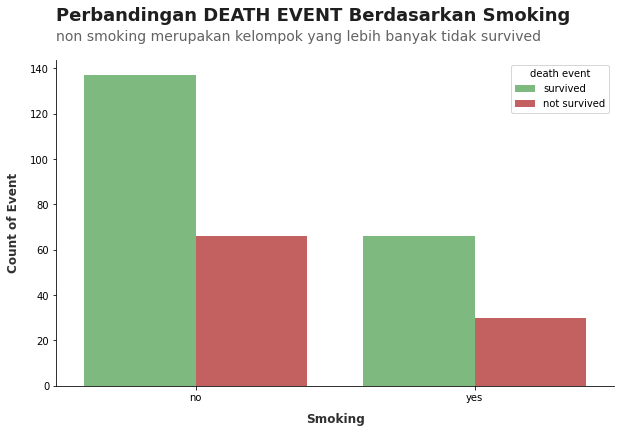

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# membuat plot perbandingan death event berdasarkan smoking 
sns.countplot(x='smoking',hue='DEATH_EVENT', data=temp, palette=[colors_green[2],colors_red[3]])

# mengatur legend
plt.legend(title='death event', loc='upper right', labels=['survived', 'not survived'])

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# set label
ax.set_xlabel("Smoking", fontsize=12, labelpad=10, fontweight='bold', color=colors_dark[1])
ax.set_ylabel("Count of Event", fontsize=12, labelpad=10, fontweight='bold', color=colors_dark[1])

# mengatur title dan annotate
plt.text(s="Perbandingan DEATH EVENT Berdasarkan Smoking", ha='left', x=xmin, y=ymax*1.12, fontsize=18, fontweight='bold', color=colors_dark[0])
plt.title("non smoking merupakan kelompok yang lebih banyak tidak survived", y=1.04, loc='left', fontsize=14, color=colors_dark[2]) 
sns.despine()
plt.show()

In [ ]:
# menghitung jumlah pasien smoking dan meninggal
smoking_death = len(df[(df['smoking'] == 1) & (df['DEATH_EVENT']==1)])

# menghitung jumlah pasien tidak smoking dan meninggal
nsmoking_death = len(df[(df['smoking'] == 0) & (df['DEATH_EVENT']==1)])

# menghitung persentase pasien yang meninggal berdasarkan smoking atau tidak => jumlah pasien smoking/non-smoking yang meninggal dibagi dengan total pasien yang meninggal
percent_smoking_death, percent_nsmoking_death = round(smoking_death/total_death,2), round(nsmoking_death/total_death,2)
percent_smoking_death, percent_nsmoking_death

(0.31, 0.69)

**Berdasarkan plot di atas, pada dataset ini ternyata pasien yang tidak merokok lebih banyak yang meninggal daripada yang merokok. Dari data ini sekitar 31% pasien penyakit jantung yang merokok meninggal dan 69% yang tidak merokok dan meninggal**

In [ ]:
# meng-copy df dengan fitur diabetes dan death event ke dalam variabel baru
temp = df[['diabetes','DEATH_EVENT']].copy()

# mengubah value 0 dan 1 menjadi no dan yes (untuk visualisasi)
temp['diabetes'].replace({0:'no', 1:'yes'}, inplace=True)

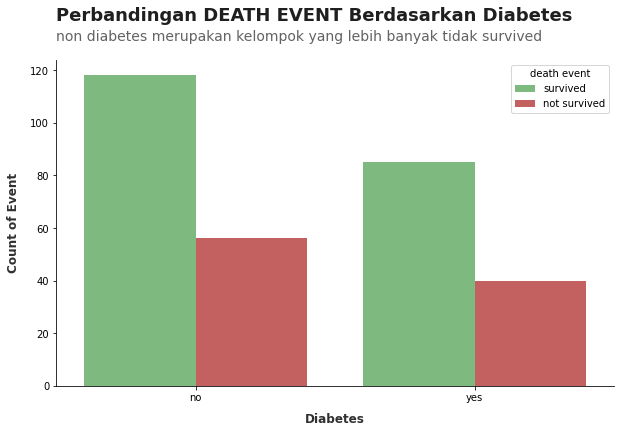

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# membuat plot perbandingan death event berdasarkan diabetes
sns.countplot(x='diabetes',hue='DEATH_EVENT', data=temp, palette=[colors_green[2],colors_red[3]])

# mengatur legend
plt.legend(title='death event', loc='upper right', labels=['survived', 'not survived'])

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# set label
ax.set_xlabel("Diabetes", fontsize=12, labelpad=10, fontweight='bold', color=colors_dark[1])
ax.set_ylabel("Count of Event", fontsize=12, labelpad=10, fontweight='bold', color=colors_dark[1])

# mengatur title dan annotate
plt.text(s="Perbandingan DEATH EVENT Berdasarkan Diabetes", ha='left', x=xmin, y=ymax*1.12, fontsize=18, fontweight='bold', color=colors_dark[0])
plt.title("non diabetes merupakan kelompok yang lebih banyak tidak survived", y=1.04, loc='left', fontsize=14, color=colors_dark[2]) 
sns.despine()
plt.show()

In [ ]:
# menghitung jumlah pasien diabetes dan meninggal
diabetes_death = len(df[(df['diabetes'] == 1) & (df['DEATH_EVENT']==1)])

# menghitung jumlah pasien non diabetes dan meninggal
ndiabetes_death = len(df[(df['diabetes'] == 0) & (df['DEATH_EVENT']==1)])

# menghitung persentase pasien yang meninggal berdasarkan diabetes atau tidak => jumlah pasien diabetes/non-diabetes yang meninggal dibagi dengan total pasien yang meninggal
percent_diabetes_death, percent_ndiabetes_death = round(diabetes_death/total_death,2), round(ndiabetes_death/total_death,2)
percent_diabetes_death, percent_ndiabetes_death

(0.42, 0.58)

**Berdasarkan plot di atas, pada dataset ini pasien yang meninggal didominasi oleh pasien yang tidak diabetes yaitu sebanyak 58% sedangkan pasien yang diabetes yang meninggal sebanyak 42%.**

In [ ]:
# meng-copy df dengan fitur anaemia dan death event ke dalam variabel baru
temp = df[['anaemia','DEATH_EVENT']].copy()

# mengubah value 0 dan 1 menjadi no dan yes (untuk visualisasi)
temp['anaemia'].replace({0:'no', 1:'yes'}, inplace=True)

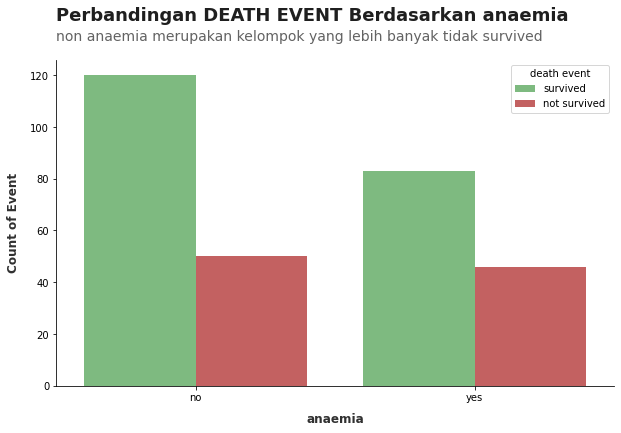

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# membuat plot perbandingan death event berdasarkan anaemia
sns.countplot(x='anaemia',hue='DEATH_EVENT', data=temp, palette=[colors_green[2],colors_red[3]])

# mengatur legend
plt.legend(title='death event', loc='upper right', labels=['survived', 'not survived'])

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# set label
ax.set_xlabel("anaemia", fontsize=12, labelpad=10, fontweight='bold', color=colors_dark[1])
ax.set_ylabel("Count of Event", fontsize=12, labelpad=10, fontweight='bold', color=colors_dark[1])

# mengatur title dan annotate
plt.text(s="Perbandingan DEATH EVENT Berdasarkan anaemia", ha='left', x=xmin, y=ymax*1.12, fontsize=18, fontweight='bold', color=colors_dark[0])
plt.title("non anaemia merupakan kelompok yang lebih banyak tidak survived", y=1.04, loc='left', fontsize=14, color=colors_dark[2]) 
sns.despine()
plt.show()

In [ ]:
# menghitung jumlah pasien anaemia dan meninggal
anemia_death = len(df[(df['anaemia'] == 1) & (df['DEATH_EVENT']==1)])

# menghitung jumlah pasien non anaemia dan meninggal
nanemia_death = len(df[(df['anaemia'] == 0) & (df['DEATH_EVENT']==1)])

# menghitung persentase pasien yang meninggal berdasarkan anaemia atau tidak => jumlah pasien anaemia/non-anaemia yang meninggal dibagi dengan total pasien yang meninggal
percent_anemia_death, percent_nanemia_death = round(anemia_death/total_death,2), round(nanemia_death/total_death,2)
percent_anemia_death, percent_nanemia_death

(0.48, 0.52)

**Berdasarkan plot di atas, pada dataset ini pasien yang meninggal didominasi oleh pasien yang tidak memiliki anemia yaitu sebanyak 52% sedangkan pasien yang memiliki anemia dan meninggal sebanyak 48%.**

In [ ]:
# meng-copy df dengan fitur high_blood_pressure dan death event ke dalam variabel baru
temp = df[['high_blood_pressure','DEATH_EVENT']].copy()

# mengubah value 0 dan 1 menjadi no dan yes (untuk visualisasi)
temp['high_blood_pressure'].replace({0:'no', 1:'yes'}, inplace=True)

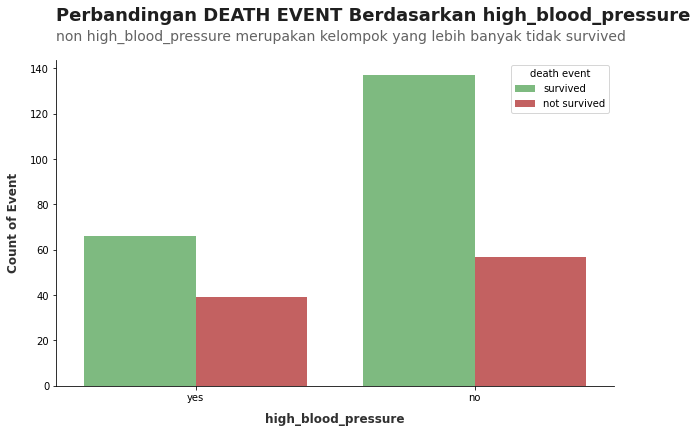

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# membuat plot perbandingan death event berdasarkan high_blood_pressure
sns.countplot(x='high_blood_pressure',hue='DEATH_EVENT', data=temp, palette=[colors_green[2],colors_red[3]])

# mengatur legend
plt.legend(title='death event', loc='upper right', labels=['survived', 'not survived'])

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# set label
ax.set_xlabel("high_blood_pressure", fontsize=12, labelpad=10, fontweight='bold', color=colors_dark[1])
ax.set_ylabel("Count of Event", fontsize=12, labelpad=10, fontweight='bold', color=colors_dark[1])

# mengatur title dan annotate
plt.text(s="Perbandingan DEATH EVENT Berdasarkan high_blood_pressure", ha='left', x=xmin, y=ymax*1.12, fontsize=18, fontweight='bold', color=colors_dark[0])
plt.title("non high_blood_pressure merupakan kelompok yang lebih banyak tidak survived", y=1.04, loc='left', fontsize=14, color=colors_dark[2]) 
sns.despine()
plt.show()

In [ ]:
# menghitung jumlah pasien high_blood_pressure dan meninggal
dt_death = len(df[(df['high_blood_pressure'] == 1) & (df['DEATH_EVENT']==1)])

# menghitung jumlah pasien non high_blood_pressure dan meninggal
ndt_death = len(df[(df['high_blood_pressure'] == 0) & (df['DEATH_EVENT']==1)])

In [ ]:
# menghitung persentase pasien yang meninggal berdasarkan high_blood_pressure atau tidak => jumlah pasien high_blood_pressure/non-high_blood_pressure 
# yang meninggal dibagi dengan total pasien yang meninggal
print(dt_death/total_death * 100,'% orang yang memiliki Darah Tinggi dan Meninggal')
print(ndt_death/total_death * 100,'% orang yang tidak memiliki Darah Tinggi dan Meninggal')

40.625 % orang yang memiliki Darah Tinggi dan Meninggal
59.375 % orang yang tidak memiliki Darah Tinggi dan Meninggal


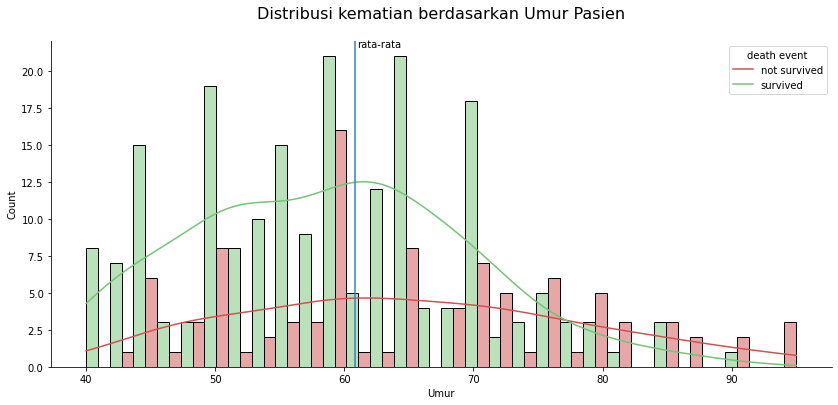

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))

# membuat plot distribusi kematian berdasarkan umur pasien
sns.histplot(x='age', data=df, hue='DEATH_EVENT', bins=30, multiple='dodge', kde=True, palette=[colors_green[2],colors_red[3]])

# mengatur title dan label
plt.title('Distribusi kematian berdasarkan Umur Pasien', y=1.05, fontsize=16)
plt.xlabel('Umur')

# mengatur legend
plt.legend(title='death event', loc='upper right', labels=['not survived','survived'])

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
plt.axvline(x=df.age.mean(),ymin=ymin,ymax=ymax, color=colors_blue[3])
plt.annotate('rata-rata',xy=(61,21.6))

sns.despine()
plt.show()

**Berdasarkan plot distribusi di atas, pasien jantung dengan umur 60 ke atas lebih berisiko untuk meninggal**

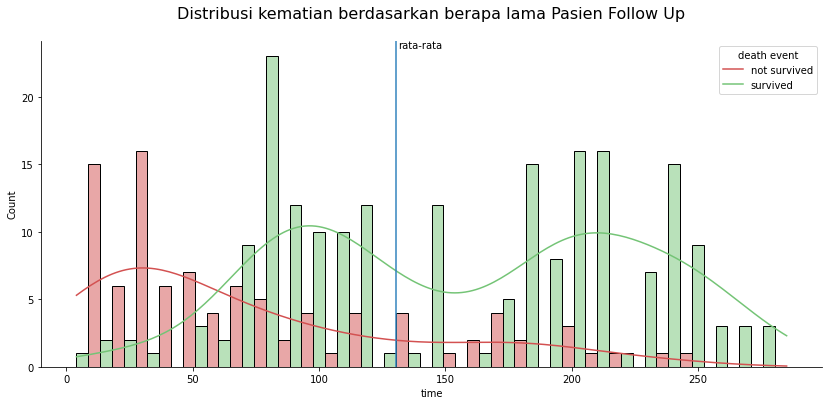

In [ ]:
plt.figure(figsize=(14,6))

# membuat plot distribusi kematian berdasarkan berapa lama pasien Follow Up
sns.histplot(x='time', data=df, hue='DEATH_EVENT', bins=30, multiple='dodge', kde=True, palette=[colors_green[2],colors_red[3]])

# mengatur title dan label
plt.title('Distribusi kematian berdasarkan berapa lama Pasien Follow Up', y=1.05, fontsize=16)
plt.xlabel('time')

# mengatur legend
plt.legend(title='death event', loc='upper right', labels=['not survived','survived'])

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
plt.axvline(x=df.time.mean(),ymin=ymin,ymax=ymax, color=colors_blue[3])
plt.annotate('rata-rata',xy=(df.time.mean()+1,23.6))

sns.despine()
plt.show()

**Berdasarkan plot distribusi di atas, pasien jantung yang follow up dengan cepat ternyata lebih banyak yang meninggal daripada yang follow up lebih lama**

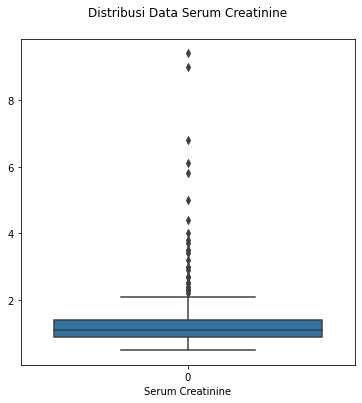

In [ ]:
plt.figure(figsize=(6,6))

# membuat plot distribusi data serum creatinine
sns.boxplot(data=df['serum_creatinine'])
plt.title('Distribusi Data Serum Creatinine', y=1.05)
plt.xlabel('Serum Creatinine')
plt.show()

In [ ]:
# query dimana serum creatinine > 2.5 (lebih tinggi dari normal) dan meninggal
df[(df['serum_creatinine'] > 2.5) & (df['DEATH_EVENT'] == 1)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1
10,75.0,1,81,0,38,1,368000.00,4.0,131,1,1,10,1
28,58.0,1,60,0,38,0,153000.00,5.8,134,1,0,26,1
31,85.0,0,23,0,45,0,360000.00,3.0,132,1,0,28,1
35,69.0,0,582,1,35,0,228000.00,3.5,134,1,0,30,1
39,60.0,0,235,1,38,0,329000.00,3.0,142,0,0,30,1
48,80.0,1,553,0,20,1,140000.00,4.4,133,1,0,41,1
52,60.0,0,3964,1,62,0,263358.03,6.8,146,0,0,43,1
65,60.0,0,68,0,20,0,119000.00,2.9,127,1,1,64,1


**Dari boxplot di atas dapat diketahui bahwa pada fitur serum_creatinine terdapat nilai pencilan. Pada tabel di atas hampir seluruh Pasien yang meninggal dan memiliki serum_creatinine yang tinggi pasti memiliki diabetes/tekanan darah tinggi yang mana hal ini memang sering terjadi di real life. Oleh karena itu pencilan di data tersebut tidak dihapus.**

In [ ]:
# import feature selection
from sklearn.feature_selection import VarianceThreshold

# split df menjadi fitur dan target
X= df.drop('DEATH_EVENT', axis=1)
y= df['DEATH_EVENT']

# split data fitur dan target menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 1)

# menghitung variance dimana thresholdnya 0
vth = VarianceThreshold(threshold=0)  # as deafult threshold=0

# fit data train
vth.fit(X_train)
X_train_vth = X_train.iloc[:, vth.get_support()]

# simpan hasil variance ke dalam dataframe baru
pd.DataFrame( {'Feature': X_train.columns,'Variance': vth.variances_,}).sort_values('Variance', ascending=True)

,Feature,Variance
10,smoking,0.210501
5,high_blood_pressure,0.225381
9,sex,0.226677
3,diabetes,0.243343
1,anaemia,0.247265
7,serum_creatinine,1.179684
8,serum_sodium,20.727473
0,age,55.000000
4,ejection_fraction,66.000000
11,time,276.000000


**Karena tidak ada variance = 0 maka tidak ada kolom yang dihapus**

### Data Preprocessing

In [ ]:
# cek numeric columns
numeric_columns

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

In [ ]:
# copy df dengan numeric columns ke dataframe baru
df_numeric = df[numeric_columns].copy()

In [ ]:
# drop numeric columns di data df
df.drop(columns=numeric_columns, inplace=True)
df

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0,0,1,1,0,1
1,0,0,0,1,0,1
2,0,0,0,1,1,1
3,1,0,0,1,0,1
4,1,1,0,0,0,1
...,...,...,...,...,...,...
294,0,1,1,1,1,0
295,0,0,0,0,0,0
296,0,1,0,0,0,0
297,0,0,0,1,1,0


In [ ]:
# concat df numeric dengan df (mengubah posisi columns)
df = pd.concat([df_numeric,df], axis=1)
df

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,75.0,582,20,265000.00,1.9,130,4,0,0,1,1,0,1
1,55.0,7861,38,263358.03,1.1,136,6,0,0,0,1,0,1
2,65.0,146,20,162000.00,1.3,129,7,0,0,0,1,1,1
3,50.0,111,20,210000.00,1.9,137,7,1,0,0,1,0,1
4,65.0,160,20,327000.00,2.7,116,8,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,270,0,1,1,1,1,0
295,55.0,1820,38,270000.00,1.2,139,271,0,0,0,0,0,0
296,45.0,2060,60,742000.00,0.8,138,278,0,1,0,0,0,0
297,45.0,2413,38,140000.00,1.4,140,280,0,0,0,1,1,0


In [ ]:
# split df menjadi fitur dan target
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

In [ ]:
# split data fitur dan target menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 1)

In [ ]:
# mendefinisikan scaler
scaler = StandardScaler()

# scale data yang numeric columns
X_train.loc[:,numeric_columns] = scaler.fit_transform(X_train.loc[:,numeric_columns])
X_test.loc[:,numeric_columns] = scaler.transform(X_test.loc[:,numeric_columns])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


### Pendefinisian Model

In [ ]:
# mendefinisikan model
rf = RandomForestClassifier()

### Pelatihan Model

In [ ]:
# fit data train
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Evaluasi Model

In [ ]:
# predict data test dengan model rf
y_pred = rf.predict(X_test)

# melihat score dari data test
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        46
           1       0.77      0.71      0.74        14

    accuracy                           0.88        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.88      0.88      0.88        60



### Eksperimen dengan GridSearchCV

In [ ]:
# import GridSerachCV untuk tuning hyperparameter
from sklearn.model_selection import GridSearchCV

# hyperparameter yang akan dituning
param_grid = {
    'bootstrap': [True, False],
    'criterion' : ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [5, 7, 9],
    'n_estimators': [100, 200, 300, 400],
    'random_state': [42],
}

# mendefinisikan gridsearchcv
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
# fit data train dengan gridsearchcv
grid_search.fit(X_train, y_train)

# melihat best parameter
print(grid_search.best_params_)

# melihat best estimator
rf_cv = grid_search.best_estimator_

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.8min


{'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 100, 'random_state': 42}


[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  2.3min finished


In [ ]:
# predict data test dengan model tuning hyperparameter
y_pred = rf_cv.predict(X_test)

# melihat score dari data test 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.92      0.79      0.85        14

    accuracy                           0.93        60
   macro avg       0.93      0.88      0.90        60
weighted avg       0.93      0.93      0.93        60



### Pickle

In [ ]:
# mendefinisikan dictionary yang berisi scaler dan model yang akan dipickle
d ={
    'scaler' : scaler,
    'model' : rf_cv
}

In [ ]:
# cek model 
test = d['model']
test

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# pickle dictionary yang berisi model dan scaler
with open ('obj.pkl', 'wb') as f:
    pickle.dump(d, f)

### Model Inference

In [ ]:
# mendefinisikan new data yang digunakan untuk model inference
new_data = [46,80,30,290000,0.8,170,90,0,1,0,0,1]

# scale 6 value pertama
scaled = scaler.transform([new_data[:7]])

In [ ]:
# assign new data dengan list data dengan value index ke 7 sampai terakhir
new_data = np.array(new_data[7:])

# concat data menjadi satu list lagi dengan data yang telah di scale
new_data = np.concatenate((np.reshape(scaled, 7),new_data))
new_data

array([-1.24873987, -0.50553823, -0.66373165,  0.36138819, -0.58084862,
        7.32373707, -0.50367119,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ])

In [ ]:
# predict new data
rf_cv.predict([new_data])

array([0])

In [ ]:
# mendefinisikan new data baru yang digunakan untuk model inference
new_data1 = [60,580,55,280000,4,138,40,1,0,0,1,1]

# scale 6 value pertama
scaled = scaler.transform([new_data1[:7]])

In [ ]:
# assign new data1 dengan list new data1 dengan value index ke 7 sampai terakhir
new_data1 = np.array(new_data1[7:])
new_data1

array([1, 0, 0, 1, 1])

In [ ]:
# concat data menjadi satu list lagi dengan data yang telah di scale
new_data1 = np.concatenate((np.reshape(scaled, 7),new_data1))
new_data1

array([-0.08389917, -0.02678988,  1.43902371,  0.25323452,  2.36538447,
        0.29500811, -1.14547869,  1.        ,  0.        ,  0.        ,
        1.        ,  1.        ])

In [ ]:
# predict new data
rf_cv.predict([new_data1])

array([1])

### Kesimpulan

Berdasarkan eksplorasi dan pemodelan kita mendapatkan kesimpulan berupa:

- Tidak ditemukan missing value dan data duplikat
- Setiap fitur dengan fitur lainnya tidak ada yang highly correlation
- Dataset yang dimiliki merupakan imbalance dataset
- Pada dataset ini pasien jantung dengan jenis kelamin laki-laki lebih berisiko meninggal daripada pasien perempuan.
- Pada dataset ini pasien jantung yang tidak merokok, tidak diabetes, tidak memiliki darah tinggi dan tidak anemia lebih berisiko untuk meninggal hal ini mungkin saja terjadi karena penyakit jantung yang dialami pasien bisa saja penyakit jantung turunan. Tetapi jika kasusnya bukan penyakit turunan biasanya pasien yang diabetes lebih rentan karena peningkatan kadar gula yang diderita penderita diabetes dapat merusak pembuluh darah yang menyalurkan darah ke jantung yang menyebabkan pasokan darah pada jantung tidak memadai dan akan menyebabkan jantung bekerja terlalu keras (https://drjantung.com/). Selain itu menurut https://hellodoktor.com/ menyatakan bahwa kematian akibat komplikasi kardiovaskular seperti kegagalan jantung, strok dan serangan jantung dilaporkan lebih tinggi dalam kalangan pasien yang memiliki tekanan darah tinggi.
- Pada dataset ini pasien yang berumur 60 ke atas lebih berisiko meninggal dan juga pasien yang lebih cepat follow up juga lebih berisiko untuk meninggal.
- Evaluasi data testing disini menggunakan f1 score karena Kita tidak mau model salah prediksi sehingga kita perlu memperkecil FP dan FN/skor precision dan recallnya harus tinggi (tidak terlalu jauh berbeda). Tetapi, kedua skor tersebut juga dapat direpresentasikan dengan f1 score (Semakin bagus f1-scorenya maka semakin bagus juga precision dan recallnya). Selain itu juga kita menggunakan f1-score karena dataset yang kita miliki ini merupakan imbalance dataset. Model dengan f1-score tertinggi yaitu 85%  untuk dataset ini adalah model ensemble random forest dengan hyperparameternya,

***bootstrap=True, criterion='entropy', max_features='sqrt', min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=42***